# Flight Data

In [44]:
install.packages("data.table", dependencies=TRUE)
install.packages("DataExplorer", dependencies=TRUE)

library(data.table)
library(DataExplorer)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


### Visualizando dataset completo: 

In [ ]:
#long download time =/
load(url("http://eic.cefet-rj.br/~eogasawara/data/anac/vra-wu.RData"))
head(vra_wu)

### Visualizando dataset reduzido: 

In [93]:
load("vra-wu-small.RData")
head(vra_wu)

,destiny,arrival_expect_date,arrival_expect_hour,origin,depart_expect_date,depart_expect_hour,airline,flight,autho_code,line_type,⋯,depart_visibility,depart_events,depart_conditions,arrival_temperature,arrival_dew_point,arrival_humidity,arrival_pressure,arrival_visibility,arrival_events,arrival_conditions
20098,KJFK,2017-01-02,05:00,SAEZ,2017-01-01,23:00,ARG,1300,0,I,⋯,NA,NA,Clear,3.3,0.0,5.0,55,1032.2,13.0 km/h / 3.6 m/s,<c2>
20099,KJFK,2017-01-02,08:00,SBGR,2017-01-01,22:00,DAL,472,0,I,⋯,NA,NA,Clear,4.4,1.4,0.6,70,1032.5,13.0 km/h / 3.6 m/s,Rain
20100,KJFK,2017-01-02,09:00,SBGR,2017-01-01,22:00,TAM,8080,0,I,⋯,NA,NA,Clear,5.0,1.8,0.6,73,1033.2,14.8 km/h / 4.1 m/s,<c2>
20101,KJFK,2017-01-02,09:00,SBGR,2017-01-01,23:00,AAL,950,0,I,⋯,NA,NA,Clear,5.0,1.8,0.6,73,1033.2,14.8 km/h / 4.1 m/s,<c2>
20102,KJFK,2017-01-02,09:00,SBGL,2017-01-01,23:00,AAL,974,0,I,⋯,10,Thunderstorm,Partly Cloudy,5.0,1.8,0.6,73,1033.2,14.8 km/h / 4.1 m/s,<c2>
20103,KJFK,2017-01-02,09:00,SBGR,2017-01-01,23:00,TAM,8102,0,I,⋯,NA,NA,Clear,5.0,1.8,0.6,73,1033.2,14.8 km/h / 4.1 m/s,<c2>


### Data Explorer

In [55]:
introduce(vra_wu)

rows,columns,discrete_columns,continuous_columns,all_missing_columns,total_missing_values,total_observations,memory_usage
1268598,37,22,15,0,17186249,46938126,571875352


#### Dados ausentes por característica:

Aqui é possivel ver a porcentagem dos dados ausêntes em cada tipo de informação

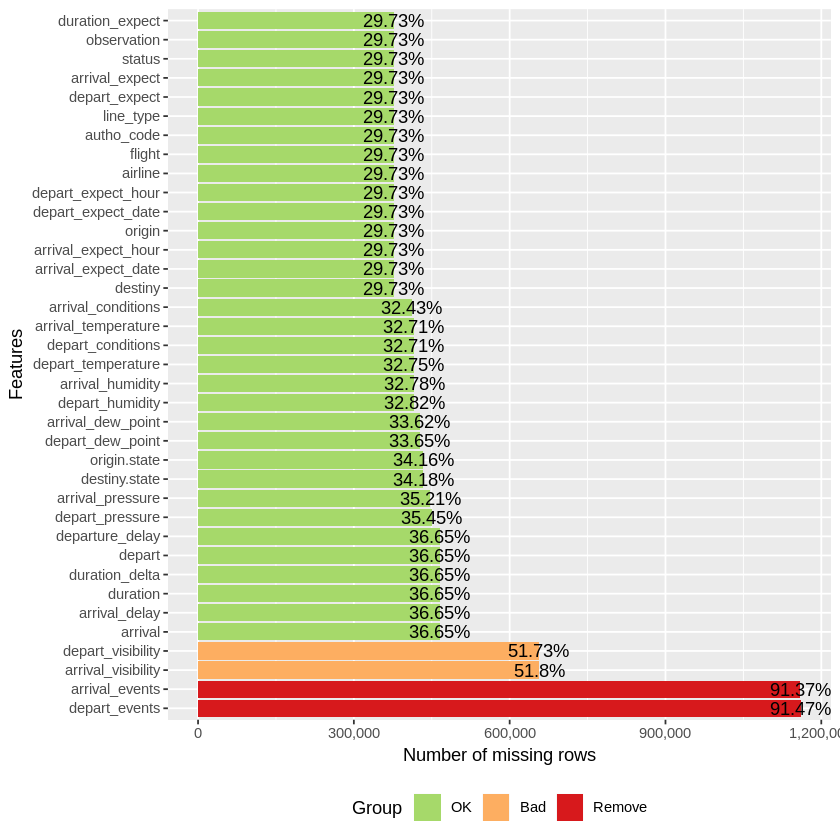

In [58]:
plot_missing(vra_wu)

#### Limpando os dados:

Removendo os dados NA's e filtrando pelos atrasos somente de 15min até 4 horas, considerando os top 10 aeroportos.

In [99]:
#data cleaning
vra_wu <- na.omit(vra_wu)
vra_wu <- vra_wu[vra_wu$arrival>vra_wu$depart,]
vra_wu <- vra_wu[vra_wu$arrival_expect>vra_wu$depart_expect,]
vw <- vra_wu[vra_wu$departure_delay >15 & vra_wu$departure_delay <240,]
vw_t10 <- vw[vw$origin == 'SBGR' | vw$origin == 'SBSP' | vw$origin == 'SBSG'
            | vw$origin == 'SBKP' | vw$origin == 'SBCT' | vw$origin == 'SBBR'
            | vw$origin == 'SBRJ' | vw$origin == 'SBBE' | vw$origin == 'SBRF' | vw$origin == 'SBGL',]

#### Distribuições:

Visualizando a distribuição de frequencias para todas as características discretas:

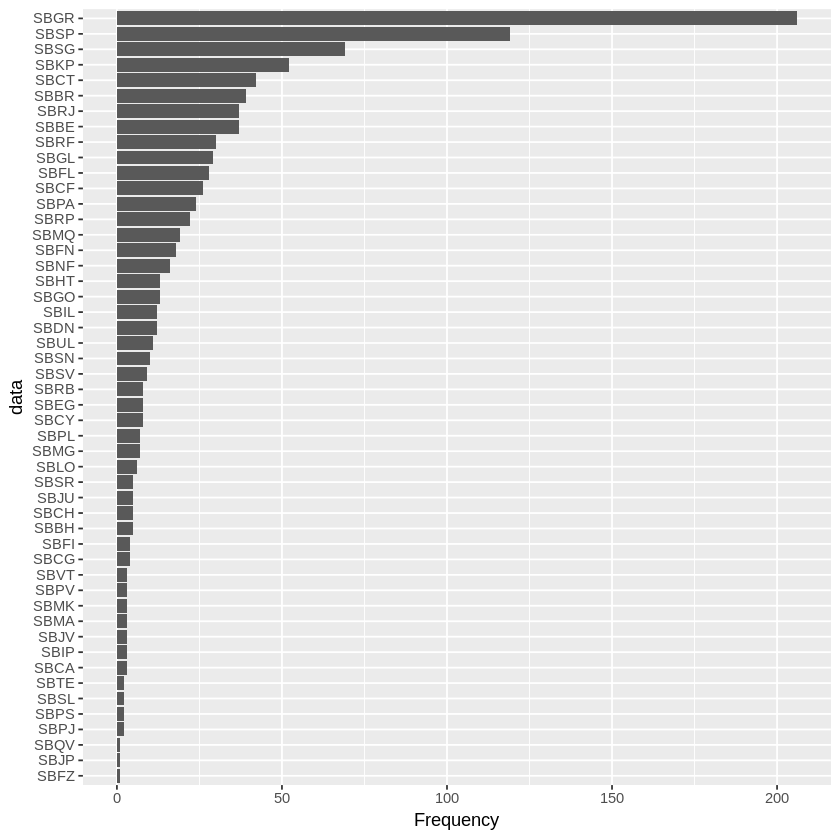

In [97]:
plot_bar(vra_wu$origin)

7 columns ignored with more than 50 categories.
arrival_expect_date: 192 categories
depart_expect_date: 184 categories
flight: 378 categories
depart_expect: 640 categories
depart: 651 categories
arrival_expect: 650 categories
arrival: 658 categories



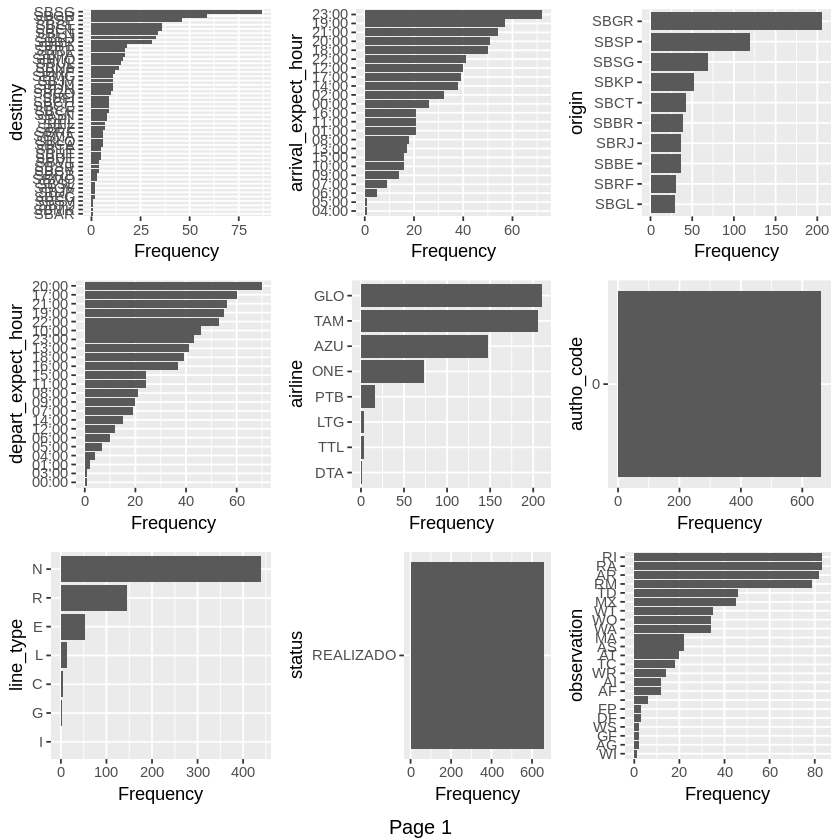

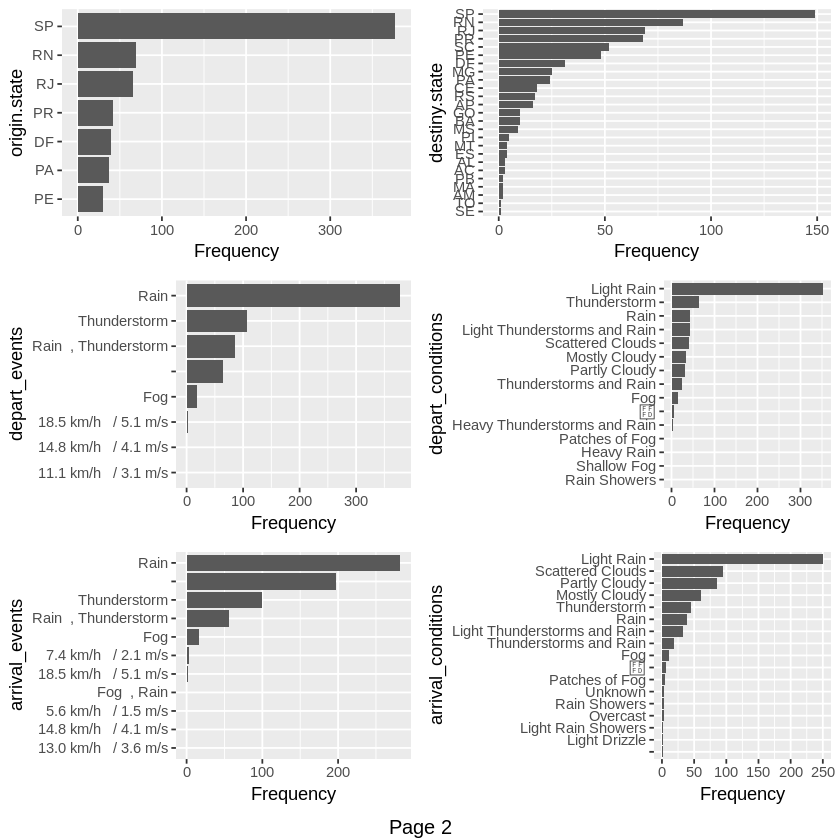

In [100]:
plot_bar(vw_t10)

#### Histograma:

Visualizando distribuições para as características contínuas:

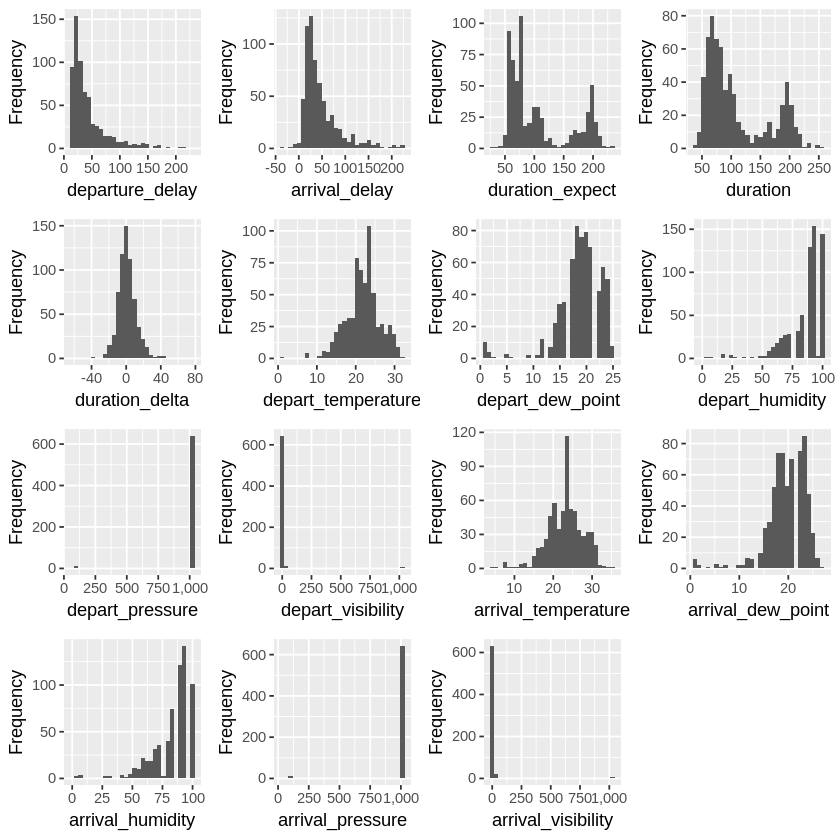

In [102]:
plot_histogram(vw_t10)

#### Análise de correlação:

Visualizando o mapa de calor da análise de correlação das características

20 features with more than 5 categories ignored!
destiny: 48 categories
arrival_expect_date: 192 categories
arrival_expect_hour: 23 categories
origin: 10 categories
depart_expect_date: 184 categories
depart_expect_hour: 23 categories
airline: 8 categories
flight: 378 categories
line_type: 7 categories
depart_expect: 640 categories
depart: 651 categories
arrival_expect: 650 categories
arrival: 658 categories
observation: 23 categories
origin.state: 7 categories
destiny.state: 25 categories
depart_events: 8 categories
depart_conditions: 15 categories
arrival_events: 11 categories
arrival_conditions: 17 categories

Warning message in cor(final_data, ...):
“the standard deviation is zero”Warning message:
“Removed 64 rows containing missing values (geom_text).”

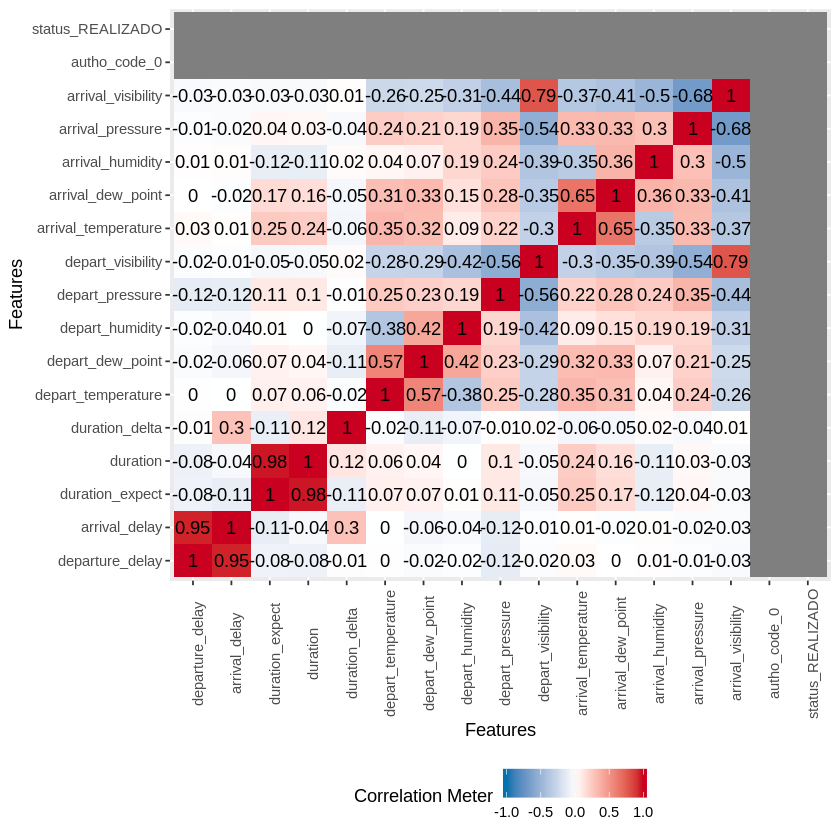

In [103]:
plot_correlation(vw_t10, maxcat = 5L, use = "pairwise.complete.obs")